Dataset Head:
    R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None

Summary Statistics:
            R&D Spend  Administration  Marketing Spend

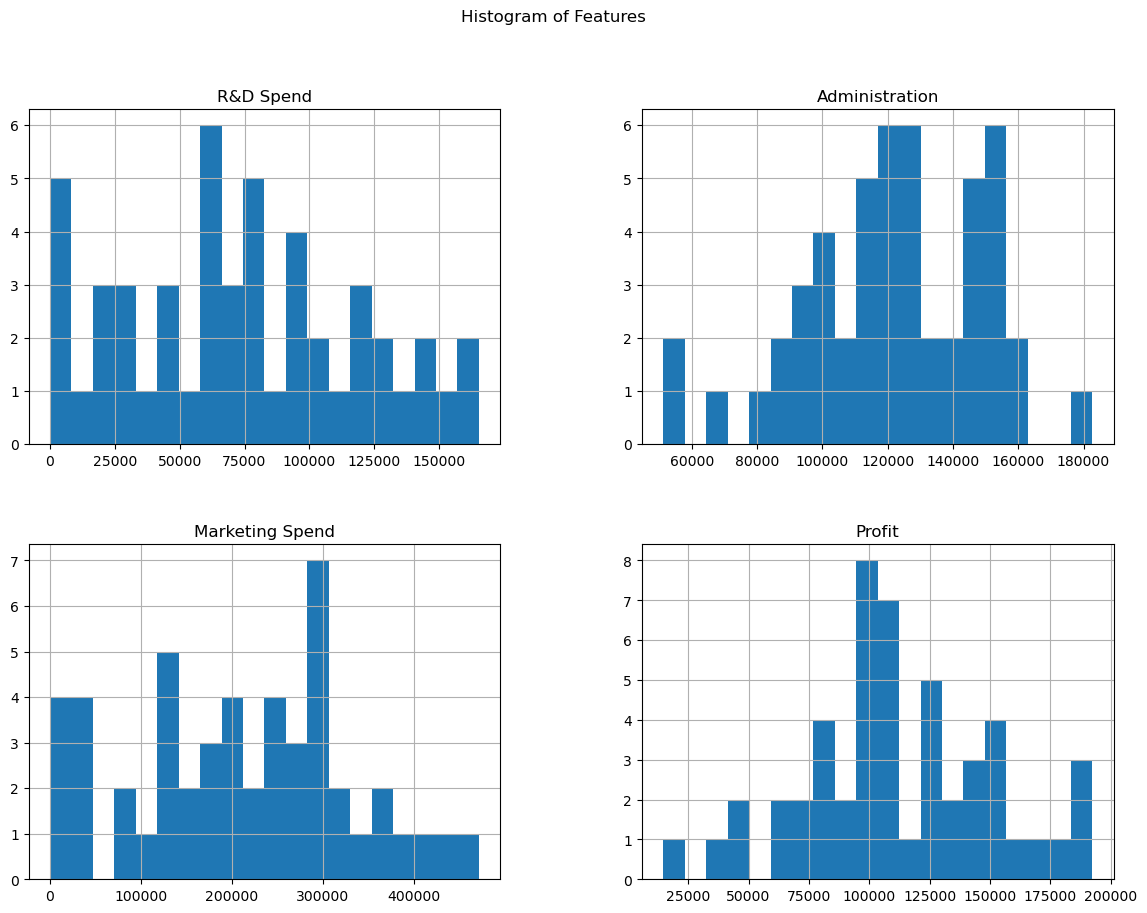

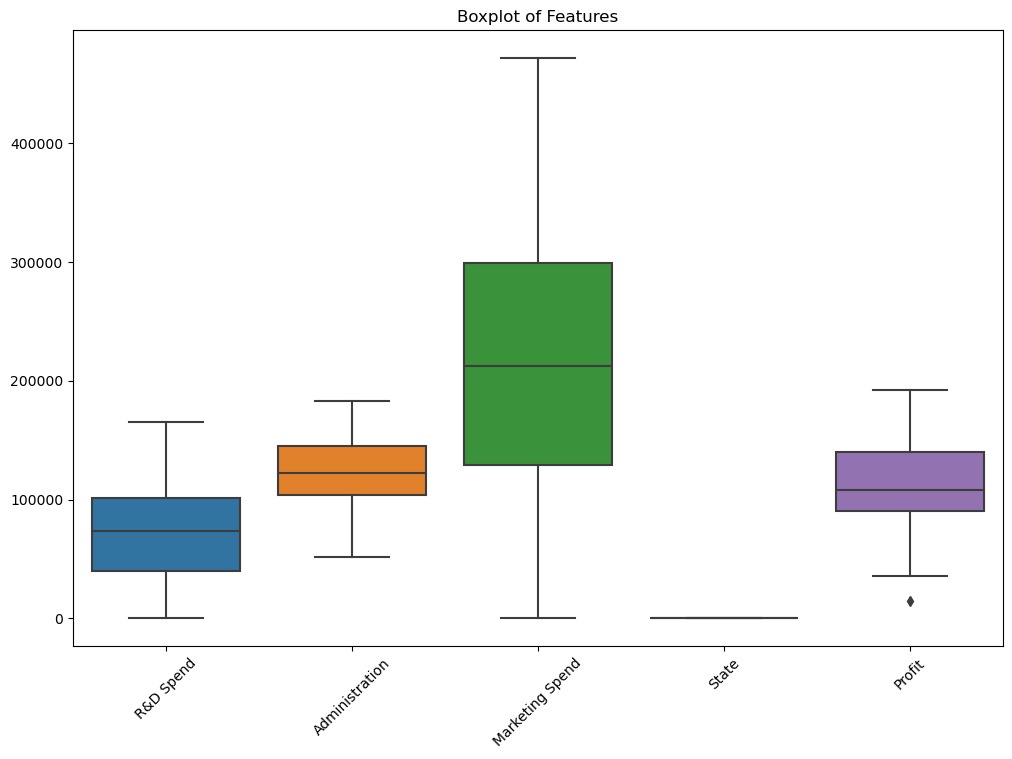

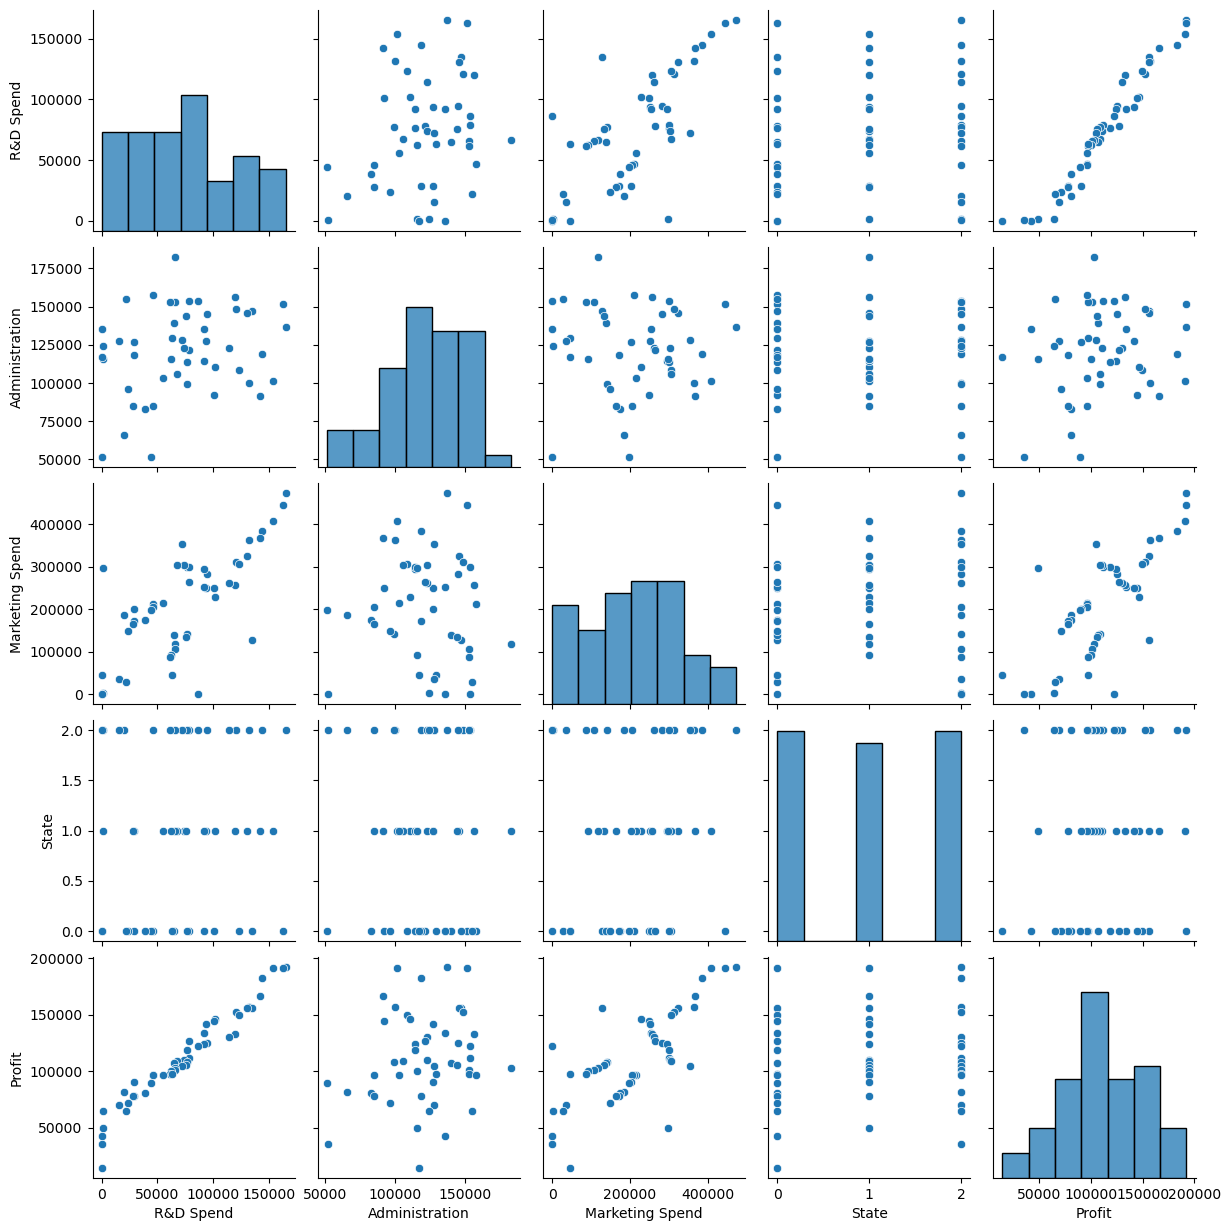

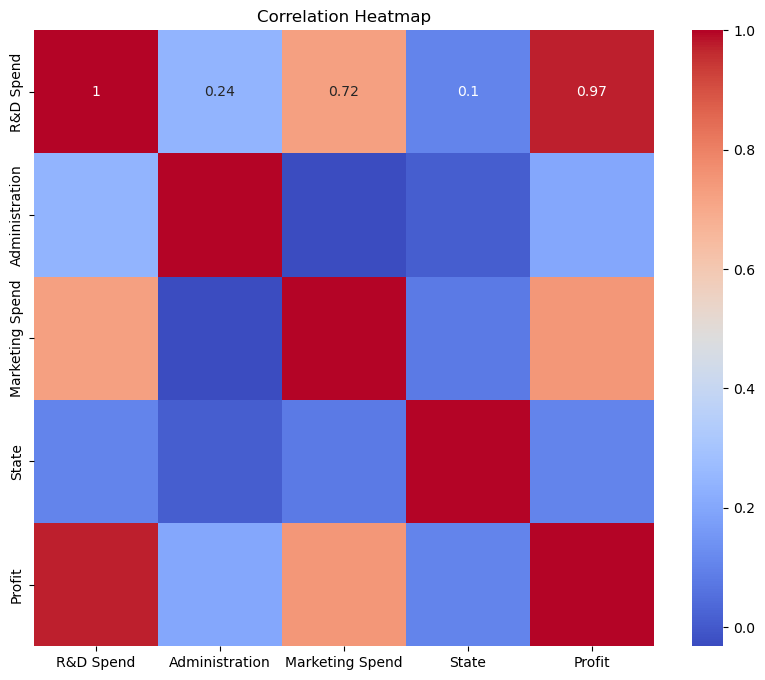


Missing Values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Model Performance Metrics:
Accuracy: 0.30
Precision: 0.15
Recall: 0.30
F1 Score: 0.20
ROC AUC Score: 0.38


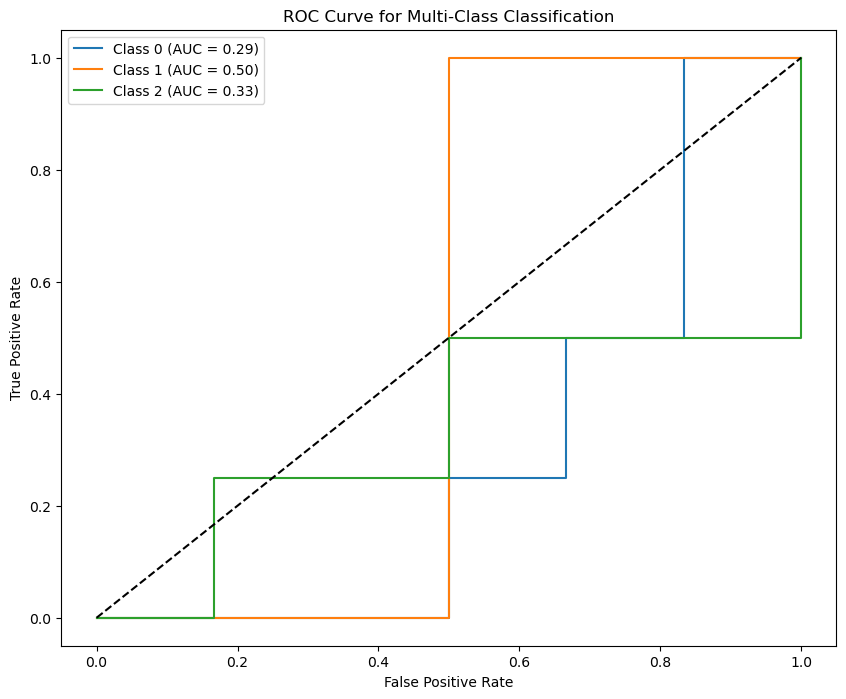

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
import warnings

# Load the dataset
data = pd.read_csv('50_Startups.csv')

# 1. Data Exploration
# a. Display the first few rows of the dataset
print("Dataset Head:\n", data.head())

# b. Summary statistics and data types
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe(include='all'))

# c. Visualizations
# Histograms
data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histogram of Features')
plt.show()

# b. Encoding categorical variables
# Convert categorical columns using LabelEncoder
# Replace 'CategoricalColumn' with the actual column name in the dataset if any
if data.select_dtypes(include=['object']).shape[1] > 0:
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        data["State"] = le.fit_transform(data["State"])

# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

warnings.filterwarnings("ignore")


# Pair plot for relationships
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Data Preprocessing
# a. Handling missing values
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())
# Impute missing values with mean or median (if applicable)
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :] = imputer.fit_transform(data)


# Split data into features (X) and target (y) variables
X = data.drop('State', axis=1)  
y = data['State'] 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Model Building
# a. Logistic Regression model
model = LogisticRegression()

# b. Training the model
model.fit(X_train, y_train)

# 4. Model Evaluation
# a. Predictions and evaluation metrics
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class='ovr')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Binarize the output labels for multi-class ROC
n_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))

# Get the probability predictions for each class
y_pred_prob = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="best")
plt.show()



